In [12]:
import pandas as pd
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

In [2]:
dir = 'raytune/tuned_2023-10-24_14-12-23'

In [ ]:
trials = []
for d in glob.glob(f'{dir}/*'):
    try:
        with open(f'{d}/result.json') as f:
            l = f.readlines()
    except (FileNotFoundError, NotADirectoryError):
        pass
        
    j = json.loads(l[-1])
    c = j.pop('config')
    df = pd.DataFrame(j|c,index=[j.pop('trial_id')])
    trials.append(df)

trials = pd.concat(trials)


In [ ]:
trials.columns

In [ ]:
trials.sort_values('pairdist')['loss pairdist lr layers layer1 actfun1 batch_size perplexity iterations_since_restore done'.split()].iloc[-20:-1]

In [3]:
trials = pd.read_csv('result.txt', sep='\s+',index_col=['Trial_name'])

In [4]:
trials.sort_values('pairdist').iloc[-20:-1]

,status,lr,layers,layer1,actfun1,batch_size,iter,total_time_(s),loss,pairdist
Trial_name,,,,,,,,,,
tuned_18a7a_00425,TERMINATED,0.004437,2,512,sigmoid,2048,207,53.7654,2.30296,1.76346
tuned_18a7a_00466,TERMINATED,0.033058,3,512,sigmoid,2048,221,49.6060,2.27743,1.76696
tuned_18a7a_00413,TERMINATED,0.011485,3,512,sigmoid,2048,159,51.5640,2.37547,1.77384
tuned_18a7a_00922,TERMINATED,0.002923,3,256,sigmoid,1024,182,30.9396,1.80044,1.77818
tuned_18a7a_00125,TERMINATED,0.016148,3,512,sigmoid,2048,156,44.2540,2.36408,1.78190
tuned_18a7a_00232,TERMINATED,0.001323,3,512,sigmoid,2048,134,47.3374,2.40019,1.78433
tuned_18a7a_00785,TERMINATED,0.054543,3,64,tanh,1024,89,21.8175,1.79789,1.79869
tuned_18a7a_00643,TERMINATED,0.022061,3,64,tanh,2048,184,62.8504,2.27421,1.81293
tuned_18a7a_00888,TERMINATED,0.019649,3,256,sigmoid,2048,244,72.0482,2.30277,1.81574


In [5]:
cvs = np.loadtxt('best.txt')

In [13]:
tr = md.load('data/traj_fit_small2noHskip5.xtc',top='data/reference3.pdb')
rmsd = md.rmsd(tr,tr[0])

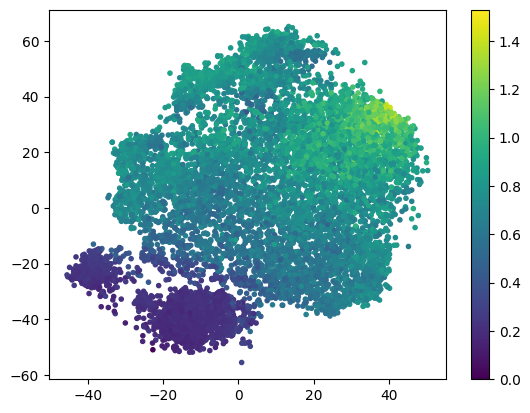

In [21]:

plt.scatter(cvs[:,0],cvs[:,1],marker='.',c=rmsd)
plt.colorbar()
plt.show()

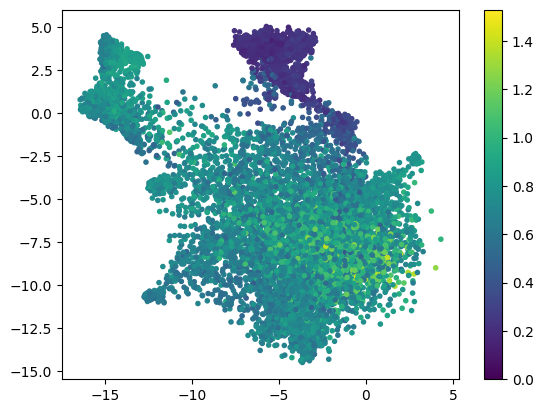

In [22]:
cvs2 = np.loadtxt('best2.txt')
plt.scatter(cvs2[:,0],cvs2[:,1],marker='.',c=rmsd)
plt.colorbar()
plt.show()

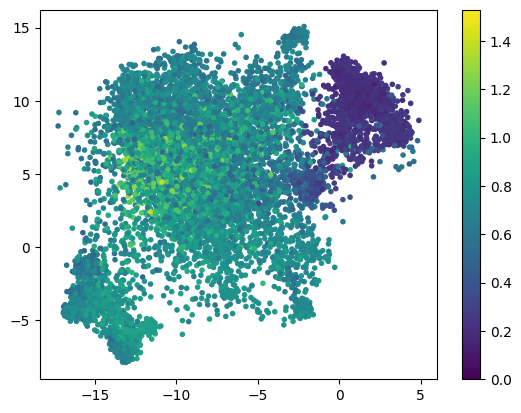

In [23]:
cvs2 = np.loadtxt('best2-5k.txt')
plt.scatter(cvs2[:,0],cvs2[:,1],marker='.',c=rmsd)
plt.colorbar()
plt.show()